In [4]:
#创建：2016/01/26
#文件：BarCodeIdentification.py
#作者：moverzp
#功能：识别条形码
import sys
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


DECODING_TABLE = {
    '0001101': 0, '0100111': 0, '1110010': 0,
    '0011001': 1, '0110011': 1, '1100110': 1,
    '0010011': 2, '0011011': 2, '1101100': 2,
    '0111101': 3, '0100001': 3, '1000010': 3, 
    '0100011': 4, '0011101': 4, '1011100': 4,
    '0110001': 5, '0111001': 5, '1001110': 5,
    '0101111': 6, '0000101': 6, '1010000': 6,
    '0111011': 7, '0010001': 7, '1000100': 7,
    '0110111': 8, '0001001': 8, '1001000': 8,
    '0001011': 9, '0010111': 9, '1110100': 9,    
    }

EDGE_TABLE = {
    2:{2:6,3:0,4:4,5:3},
    3:{2:9,3:'33',4:'34',5:5},
    4:{2:9,3:'43',4:'44',5:5},
    5:{2:6,3:0,4:4,5:3},
    }

INDEX_IN_WIDTH = (0, 4, 8, 12, 16, 20, 24, 33, 37, 41, 45, 49, 53)


def get_bar_space_width(img):
    #row = img.shape[0] *1/2
    #row = int(img.shape[0] *1/2)
    currentPix = -1
    lastPix = -1
    pos = 0
    #width = []
    
#     for i in range(img.shape[1]):#遍历一整行
#         currentPix = img[row][i]
#         if currentPix != lastPix:
#             if lastPix == -1:
#                 lastPix = currentPix
#                 pos = i
#             else:
#                 width.append( i - pos )
#                 pos = i
#                 lastPix = currentPix
#     return width
    for j in  range(img.shape[0]):
        width = [] #清空条形码存储的数据
        for i in range(img.shape[1]):#遍历一整行
            currentPix = img[j][i]
            if currentPix != lastPix:
                if lastPix == -1:
                    lastPix = currentPix
                    pos = i
                else:
                    width.append( i - pos )
                    pos = i
                    lastPix = currentPix
        if len(width) == 60:
            break;#如果数组长度没有等于60，说明扫描到的行有错误，重新扫描
    return width
    
    
    
def divide(t, l):
    if float(t) / l < 0.357:
        return 2
    elif float(t) / l < 0.500:
        return 3
    elif float(t) / l < 0.643:
        return 4
    else:
        return 5
    
def cal_similar_edge(data):
    similarEdge = []
    #先判断起始符
#     limit = float(data[1] + data[2] + data[3] ) / 3 * 1.5
#     if data[1] >= limit or data[2] >= limit or data[3] >= limit:
#         return -1#宽度提取失败
    index = 4
    while index < 54:
        #跳过分隔符区间
        if index==28 or index==29 or index==30 or index==31 or index==32:
            index +=1
            continue
        #字符检测
        T1 = data[index] + data[index+1]
        T2 = data[index+1] + data[index+2]
        L = data[index] + data[index+1] + data[index+2] + data[index+3]
        similarEdge.append( divide(T1, L) )
        similarEdge.append( divide(T2, L) )
        index += 4
 
    return similarEdge
    
def decode_similar_edge(edge):
    barCode = [6]#第一个字符一定是6，中国区
    for i in range (0, 24, 2):#每个字符两个相似边，共12个字符
        barCode.append( EDGE_TABLE[edge[i]][edge[i+1]] )
    return barCode
    
def decode_sharp(barCode, barSpaceWidth):
    for i in range(0, 13):
        if barCode[i] == '44':
            index = INDEX_IN_WIDTH[i]
            c3 = barSpaceWidth[index+2]
            c4 = barSpaceWidth[index+3]
            if c3 > c4:
                barCode[i] = 1
            else:
                barCode[i] = 7            
        elif barCode[i] == '33':
            index = INDEX_IN_WIDTH[i]
            c1 = barSpaceWidth[index]
            c2 = barSpaceWidth[index+1]
            if c1 > c2:
                barCode[i] = 2
            else:
                barCode[i] = 8
        elif barCode[i] == '34':
            index = INDEX_IN_WIDTH[i]
            c1 = barSpaceWidth[index]
            c2 = barSpaceWidth[index+1]
            if c1 > c2:
                barCode[i] = 7
            else:
                barCode[i] = 1            
        elif barCode[i] == '43':
            index = INDEX_IN_WIDTH[i]
            c2 = barSpaceWidth[index+1]
            c3 = barSpaceWidth[index+2]
            if c2 > c3:
                barCode[i] = 2
            else:
                barCode[i] = 8

def check_bar_code(barCode):
    evens = barCode[11]+barCode[9]+barCode[7]+barCode[5]+barCode[3]+barCode[1]
    odds = barCode[10]+barCode[8]+barCode[6]+barCode[4]+barCode[2]+barCode[0]
    sum = evens * 3 + odds
    if barCode[12] == (10 - sum % 10) % 10:
        return True
    else:
        return False




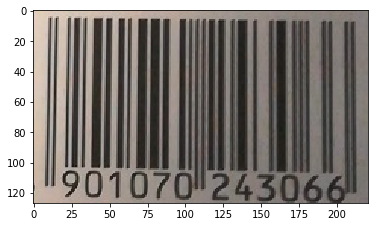

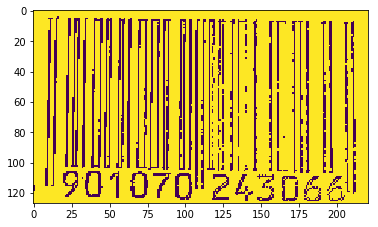

In [ ]:
#载入图像
# img = cv2.imread('3.png')
# img = cv2.imread('barcode.jpg')
img = cv2.imread('jietu.jpg')

grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#转换成单通道图像

# new_image = np.zeros(grayImg.shape, grayImg.dtype)

# alpha = 2.0 # Simple contrast control
# beta = 50    # Simple brightness control
# for y in range(grayImg.shape[0]):
#     for x in range(grayImg.shape[1]):
#             new_image[y,x] = np.clip(alpha*grayImg[y,x] + beta, 0, 255)
            
# grayImg = cv2.medianBlur(grayImg, 3)#中值滤波 
# ret, grayImg = cv2.threshold(grayImg, 80, 255, cv2.THRESH_BINARY)#二值化   
grayImg = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, 3, 10)
plt.imshow(img)
plt.show()
plt.imshow(grayImg)
# plt.imshow(new_image)
plt.show()

cv2.imshow("src", grayImg)
# cv2.imshow("det", new_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
print(img.shape[1])
print(int(img.shape[0]))

grayImg

NameError: name 'img' is not defined

In [6]:
#提取条空宽度
barSpaceWidth = get_bar_space_width(grayImg)
print ('bar & space\'s numbers:%d' %(len(barSpaceWidth)))#只有60是正确的
print (barSpaceWidth)


NameError: name 'grayImg' is not defined

In [21]:
#计算相似边数值
similarEdge = cal_similar_edge(barSpaceWidth)
if similarEdge == -1:
    sys.exit()
print ('similarEdge\'s numbers:%d'%(len(similarEdge)))
print (similarEdge)
#相似边译码
barCode = decode_similar_edge(similarEdge)
#针对‘#’译码
decode_sharp(barCode, barSpaceWidth)
#校验
valid = check_bar_code(barCode)
valid = 1
print ('barcode:\n', barCode if valid else 'Check barcode error!')

height = img.shape[0]
width = img.shape[1]
#cv2.line(grayImg, (0, height/2), (width, height/2),(0, 255, 0), 2)#画出扫描的行
cv2.line(grayImg, (0, int(height/2)), (width, int(height/2)),(0, 255, 0), 2)#画出扫描的行

# height = img.shape[0]
# width = img.shape[1]
# #cv2.line(grayImg, (0, height/2), (width, height/2),(0, 255, 0), 2)#画出扫描的行

#cv2.line(grayImg, (0, row), (width, row),(0, 255, 0), 2)#画出扫描的行
         
#显示图像
cv2.imshow("origin", img)
cv2.imshow("result", grayImg)

cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.waitKey(1)

# key = cv2.waitKey(0)
# if key == 27:
#     cv2.destroyAllWindows()


similarEdge's numbers:24
[4, 2, 2, 3, 3, 4, 2, 3, 4, 4, 5, 3, 3, 3, 2, 4, 5, 5, 5, 3, 2, 2, 2, 2]
barcode:
 [6, 9, 0, 1, 0, 7, 0, 2, 4, 3, 0, 6, 6]


In [10]:
img = cv2.imread('7.png')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#转换成单通道图像

cv2.namedWindow("src", cv2.WINDOW_NORMAL)
cv2.imshow("src",grayImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

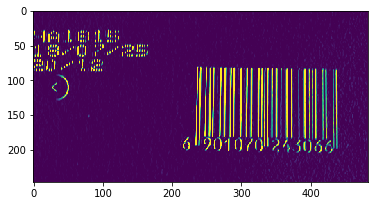

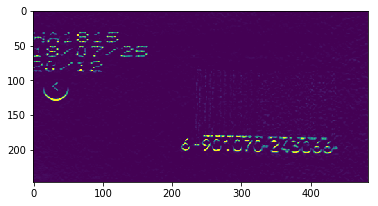

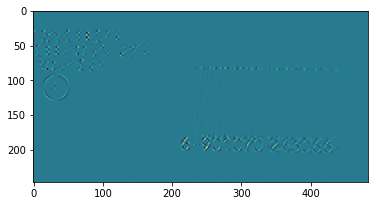

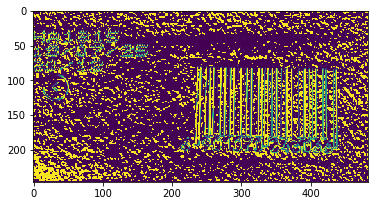

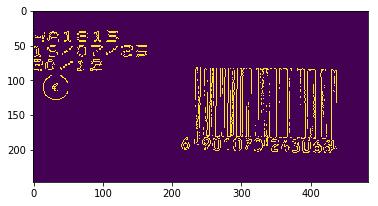

In [11]:
#cv2.GaussianBlur(grayImg,(3,3),0,medianImg,0,cv2.BORDER_CONSTANT)
medianImg = cv2.medianBlur(grayImg, ksize = 3)
cv2.namedWindow("median", cv2.WINDOW_NORMAL)
cv2.imshow("median",medianImg)

#sobelx = cv2.Sobel(grayImg,cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.Sobel(grayImg, -1, 1, 0, ksize=3)
# 利用Sobel方法可以进行sobel边缘检测
# img表示源图像，即进行边缘检测的图像
# cv2.CV_64F表示64位浮点数即64float。
# 这里不使用numpy.float64，因为可能会发生溢出现象。用cv的数据则会自动
# 第三和第四个参数分别是对X和Y方向的导数（即dx,dy），对于图像来说就是差分，这里1表示对X求偏导（差分），0表示不对Y求导（差分）。其中，X还可以求2次导。
# 注意：对X求导就是检测X方向上是否有边缘。
# 第五个参数ksize是指核的大小。
#sobely = cv2.Sobel(medianImg, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.Sobel(medianImg, -1, 0, 1, ksize=3)
# 与上面不同的是对y方向进行边缘检测

#sobelXY = cv2.Sobel(medianImg, cv2.CV_64F, 1, 1, ksize=5)
# 这里对两个方向同时进行检测，则会过滤掉仅仅只是x或者y方向上的边缘
sobelXY = cv2.Sobel(medianImg, cv2.CV_64F, 1, 1, ksize=5)

canny = cv2.Canny(medianImg, 50, 150)

plt.imshow(sobelx)
plt.show()

plt.imshow(sobely)
plt.show()

plt.imshow(sobelXY)
plt.show()

sobel = sobelx - sobely
plt.imshow(sobel)
plt.show()

plt.imshow(canny)
plt.show()
# sobelz = cv2.medianBlur(sobel, ksize = 3)
# cv2.namedWindow("sobelz", cv2.WINDOW_NORMAL)
# cv2.imshow("sobelz",sobelz)

cv2.namedWindow("src", cv2.WINDOW_NORMAL)
cv2.imshow("src",sobel)

cv2.namedWindow("src4", cv2.WINDOW_NORMAL)
cv2.imshow("src4",sobelXY)
cv2.namedWindow("canny", cv2.WINDOW_NORMAL)
cv2.imshow("canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

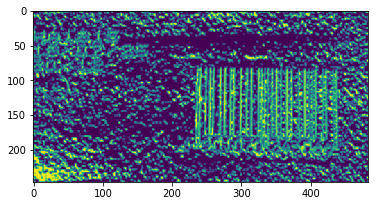

In [12]:
mean = cv2.blur(sobel, ksize = (3,3))

plt.imshow(mean)
plt.show()
cv2.namedWindow("canny", cv2.WINDOW_NORMAL)
cv2.imshow("canny", mean)
cv2.waitKey(0)

cv2.destroyAllWindows()

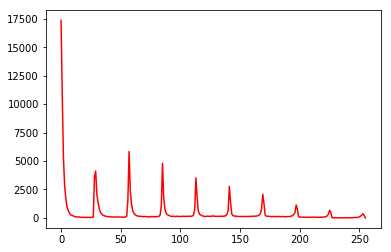

In [13]:
ostu = cv2.threshold(mean, 0, 255, cv2.THRESH_OTSU)
hist = cv2.calcHist([mean], [0], None, [256], [0, 255])
plt.plot(hist, color="r")
plt.show()

In [14]:


# cv2.namedWindow('ostu', cv2.WINDOW_NORMAL)
# cv2.imshow('ostu',ostu)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
# element = cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (3,3))
# erosion = cv2.erode(canny, element)
# plt.imshow(erosion)
# plt.show()